## importing the libraries

In [1]:
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split 
from sklearn import linear_model 
import matplotlib.pyplot as plt
from scipy.stats import skew
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn import linear_model as lm
import sklearn.metrics as metrics
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats
from sklearn.tree import DecisionTreeRegressor  
from sklearn.ensemble import RandomForestRegressor

## reading the dataset

In [3]:
ener=pd.read_csv("energydata_complete.csv")
ener.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


## checking the features

In [4]:
ener.columns

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

## shape

In [5]:
ener.shape

(19735, 29)

## Info

In [6]:
ener.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

## checking the basic statistics for the dataset

In [7]:
ener.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


## checking for NULL values

In [8]:
ener.isnull().sum()

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

## Chekcing for Na values

In [9]:
print(ener.isna().sum())

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64


## checking the appliances energy consumption

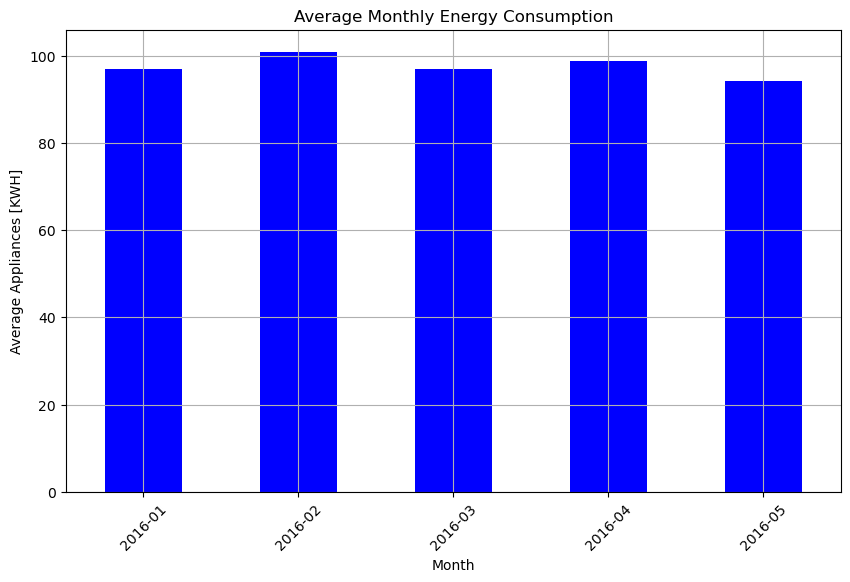

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

ener['date'] = pd.to_datetime(ener['date'])
# Assuming ener.date is a datetime column in your DataFrame
ener['month'] = ener['date'].dt.to_period('M')  # Extract month from date

# Aggregate data by month and calculate mean energy consumption for each month
monthly_ener = ener.groupby('month')['Appliances'].mean()

# Plotting the monthly data
plt.figure(figsize=(10, 6))
monthly_ener.plot(kind='bar', color='blue')
plt.title('Average Monthly Energy Consumption')
plt.xlabel('Month')
plt.ylabel('Average Appliances [KWH]')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


## checking for average weekly consumption

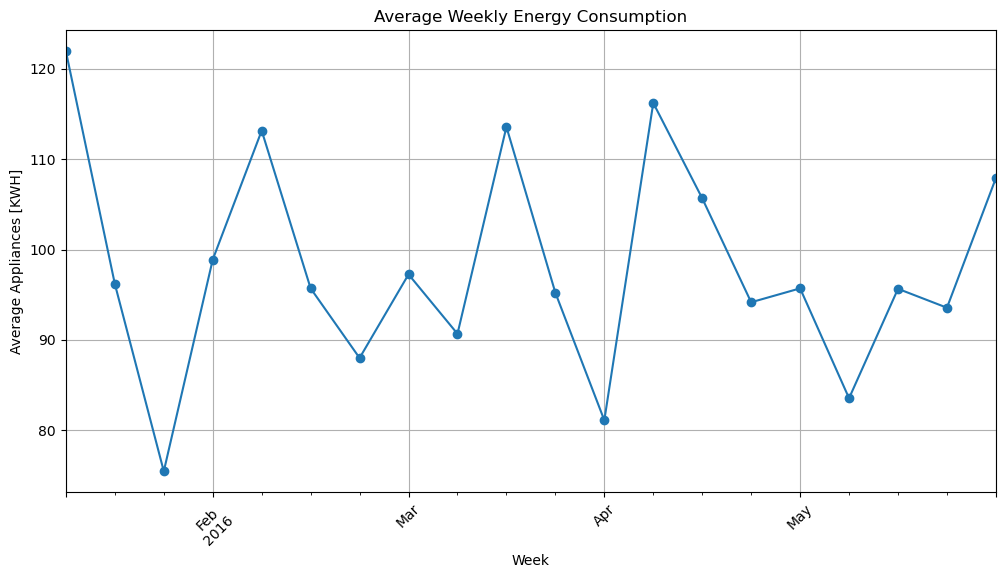

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming ener.date is a datetime column in your DataFrame
ener['week'] = ener['date'].dt.to_period('W')  # Extract week from date

# Aggregate data by week and calculate mean energy consumption for each week
weekly_ener = ener.groupby('week')['Appliances'].mean()

# Plotting the weekly data
plt.figure(figsize=(12, 6))
weekly_ener.plot(marker='o', linestyle='-')
plt.title('Average Weekly Energy Consumption')
plt.xlabel('Week')
plt.ylabel('Average Appliances [KWH]')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


## plotting a box plot

C:\Users\vishw\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\vishw\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\vishw\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\vishw\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

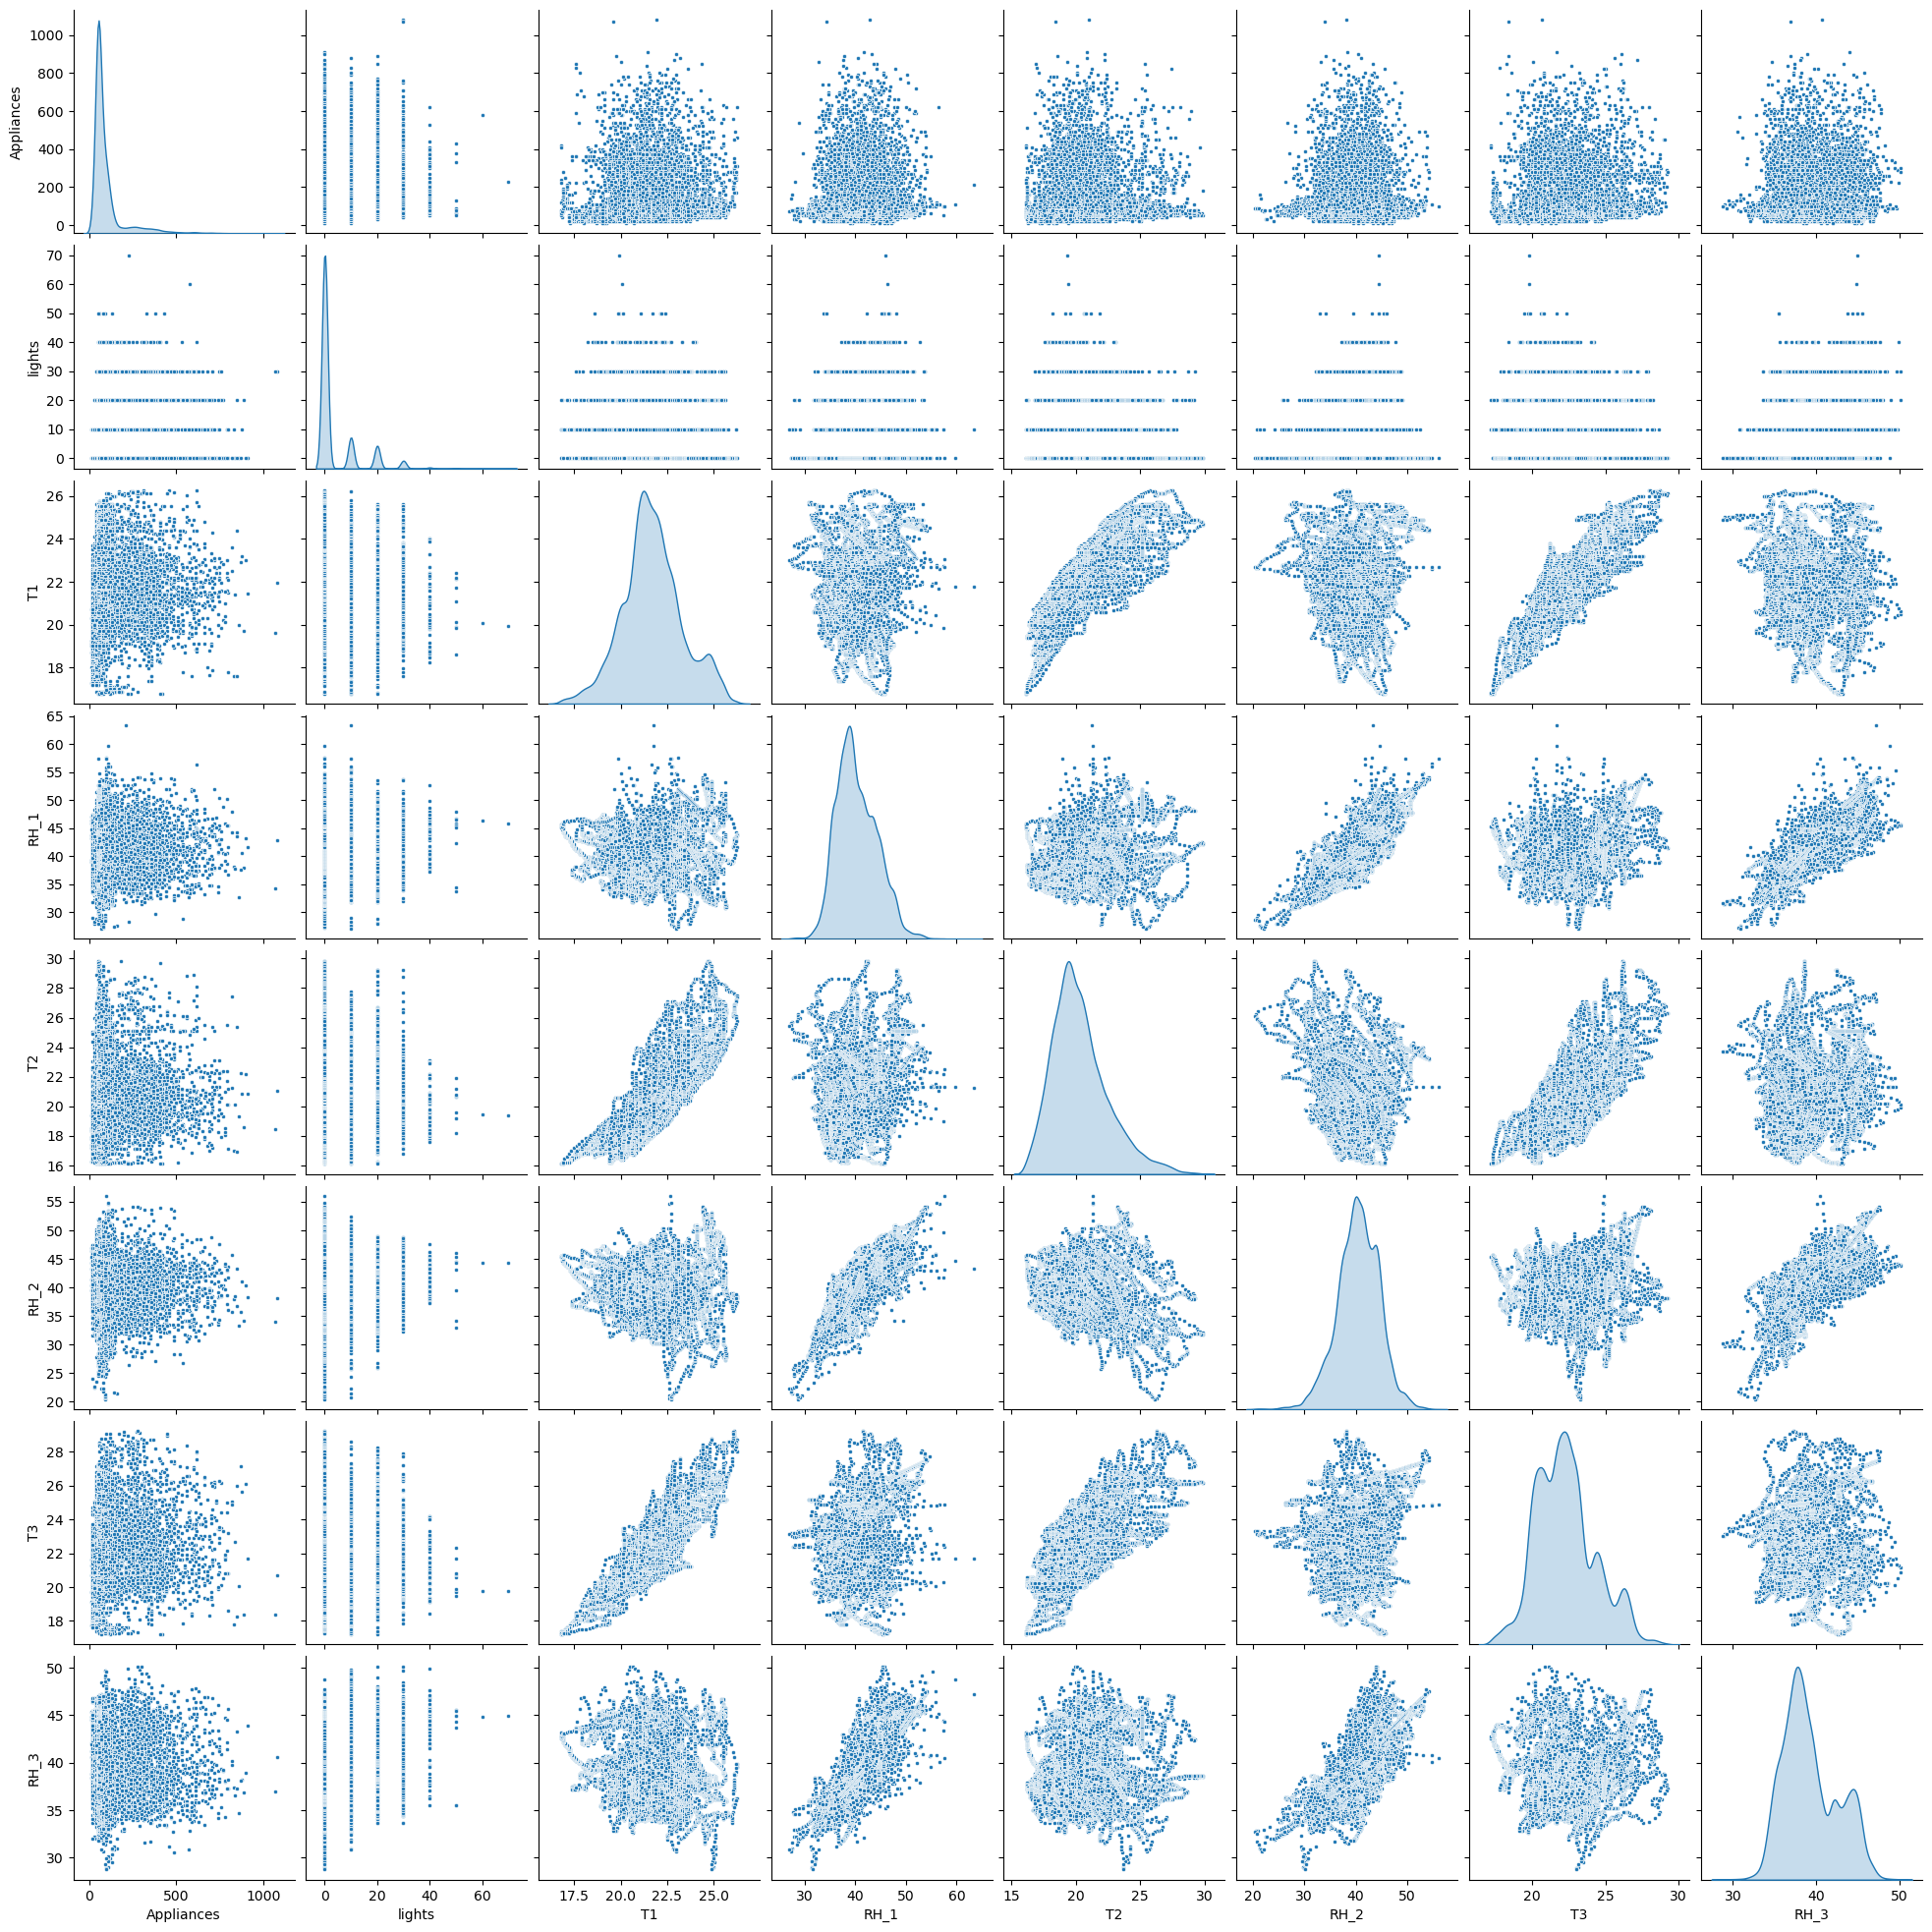

In [12]:
ener_box=ener[["Appliances","lights","T1","RH_1","T2","RH_2","T3","RH_3"]]

# Plot box plots
# Create a pair plot
sns.pairplot(ener_box, diag_kind='kde', markers='.')
plt.show()

## checking the correlation of the dataset

In [13]:
ener_box.corr()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3
Appliances,1.000000,0.197278,0.055447,0.086031,0.120073,-0.060465,0.085060,0.036292
lights,0.197278,1.000000,-0.023528,0.106968,-0.005622,0.050985,-0.097393,0.131161
T1,0.055447,-0.023528,1.000000,0.164006,0.836834,-0.002509,0.892402,-0.028550
RH_1,0.086031,0.106968,0.164006,1.000000,0.269839,0.797535,0.253230,0.844677
T2,0.120073,-0.005622,0.836834,0.269839,1.000000,-0.165610,0.735245,0.121497
RH_2,-0.060465,0.050985,-0.002509,0.797535,-0.165610,1.000000,0.137319,0.678326
T3,0.085060,-0.097393,0.892402,0.253230,0.735245,0.137319,1.000000,-0.011234
RH_3,0.036292,0.131161,-0.028550,0.844677,0.121497,0.678326,-0.011234,1.000000


## dropping unnecessary columns

In [14]:
ener=ener.drop(["rv1","rv2"],axis=1)

## creating NSM columns

In [15]:
import pandas as pd


ener['date'] = pd.to_datetime(ener['date'])

# Extract the time component
ener['time'] = ener['date'].dt.time

# Calculate seconds from midnight
ener['seconds_from_midnight'] = ener['time'].apply(lambda x: x.hour * 3600 + x.minute * 60 + x.second)

# Display the dataframe with seconds from midnight
ener.head()


,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,month,week,time,seconds_from_midnight
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,6.600000,733.5,92.0,7.000000,63.000000,5.3,2016-01,2016-01-11/2016-01-17,17:00:00,61200
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,6.483333,733.6,92.0,6.666667,59.166667,5.2,2016-01,2016-01-11/2016-01-17,17:10:00,61800
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,6.366667,733.7,92.0,6.333333,55.333333,5.1,2016-01,2016-01-11/2016-01-17,17:20:00,62400
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,6.250000,733.8,92.0,6.000000,51.500000,5.0,2016-01,2016-01-11/2016-01-17,17:30:00,63000
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,6.133333,733.9,92.0,5.666667,47.666667,4.9,2016-01,2016-01-11/2016-01-17,17:40:00,63600


## encoding the weekday values

In [17]:
import pandas as pd

# Assuming your dataframe is named 'ener' and the date column is 'date'
# Convert 'date' column to datetime format if it's not already
ener['date'] = pd.to_datetime(ener['date'])

# Define a function to classify weekdays and weekends
def classify_weekday_or_weekend(date):
    if date.weekday() >= 5:  # Saturday (5) or Sunday (6)
        return 0  # Weekend
    else:
        return 1  # Weekday

# Apply the function to the 'date' column and create a new column 'week_status'
ener['week_status'] = ener['date'].apply(classify_weekday_or_weekend)

# Display the dataframe with week status
ener.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,month,week,time,seconds_from_midnight,week_status
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,733.5,92.0,7.000000,63.000000,5.3,2016-01,2016-01-11/2016-01-17,17:00:00,61200,1
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,733.6,92.0,6.666667,59.166667,5.2,2016-01,2016-01-11/2016-01-17,17:10:00,61800,1
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,733.7,92.0,6.333333,55.333333,5.1,2016-01,2016-01-11/2016-01-17,17:20:00,62400,1
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,733.8,92.0,6.000000,51.500000,5.0,2016-01,2016-01-11/2016-01-17,17:30:00,63000,1
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,733.9,92.0,5.666667,47.666667,4.9,2016-01,2016-01-11/2016-01-17,17:40:00,63600,1


## encoding date columns

In [18]:
import pandas as pd

# Assuming your dataframe is named 'ener' and the date column is 'date'
# Convert 'date' column to datetime format if it's not already
ener['date'] = pd.to_datetime(ener['date'])

# Extract the day of the week as a numeric value (1 for Monday, 2 for Tuesday, etc.)
ener['day_of_week'] = ener['date'].dt.weekday + 1

# Display the dataframe with the day of the week
ener.head()


,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,RH_out,Windspeed,Visibility,Tdewpoint,month,week,time,seconds_from_midnight,week_status,day_of_week
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,92.0,7.000000,63.000000,5.3,2016-01,2016-01-11/2016-01-17,17:00:00,61200,1,1
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,92.0,6.666667,59.166667,5.2,2016-01,2016-01-11/2016-01-17,17:10:00,61800,1,1
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,92.0,6.333333,55.333333,5.1,2016-01,2016-01-11/2016-01-17,17:20:00,62400,1,1
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,92.0,6.000000,51.500000,5.0,2016-01,2016-01-11/2016-01-17,17:30:00,63000,1,1
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,92.0,5.666667,47.666667,4.9,2016-01,2016-01-11/2016-01-17,17:40:00,63600,1,1


## dropping unimportatnt columns

In [19]:
ener=ener.drop(["time","date","Visibility","week","month"],axis=1)

In [20]:
ener.head()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Tdewpoint,seconds_from_midnight,week_status,day_of_week
0,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,5.3,61200,1,1
1,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,5.2,61800,1,1
2,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,5.1,62400,1,1
3,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,5.0,63000,1,1
4,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,4.9,63600,1,1


## writing it into CSV for implementation in R

In [21]:
import csv

def writing_to_csv():
 
    try:
        csv_file=open("Output CSV.csv","w")
        
    except FileNotFoundError:
        ##print if file not found
        print("please enter the correct file")
    except PermissionError:
        ##print if you dont have the exact permissions
        print("sorry you dont have the right permissions")
    except Exception as error:
        ##print any other array
        print("an error was raised\n",error)

ener.to_csv("Output house.csv", sep=',', index=False)
writing_to_csv

<function __main__.writing_to_csv()>

## random forest algorithm implementation in python

Mean Squared Error: 3973.8260526982517
R-squared: 0.6028989827967033
explained_variance is  0.6
r2 is  0.6029
MAE is  29.5856
MSE is  3973.8261
RMSE is 63.0383


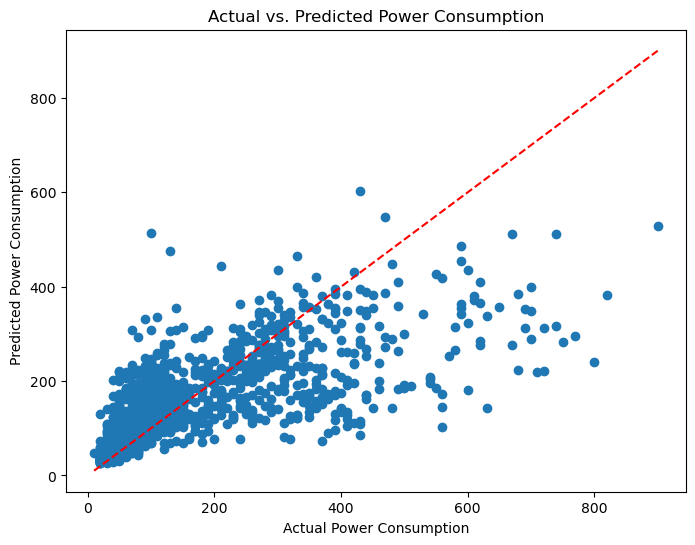

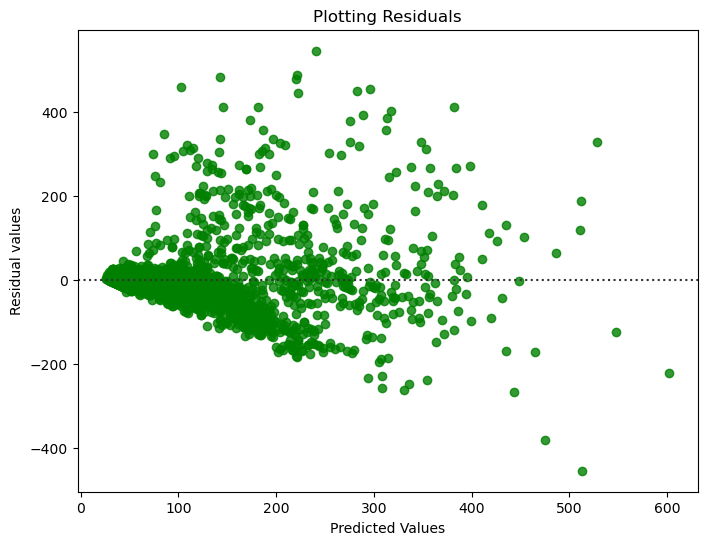

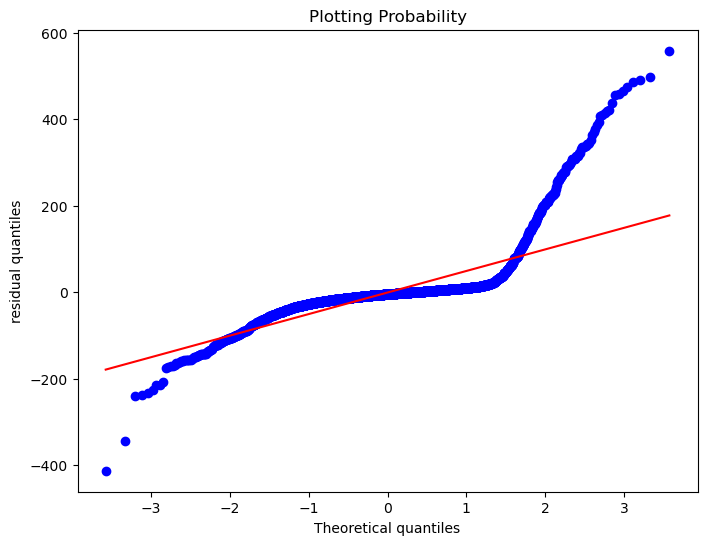

In [25]:

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

X=ener.drop(['Appliances'],axis=1)
y=ener["Appliances"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Random Forest Regressor with specified parameters
rf_regressor = RandomForestRegressor(n_estimators=100, 
                                     max_features=7,
                                     max_depth=None,
                                     min_samples_split=2,
                                     min_samples_leaf=1)

# Train the model
rf_regressor.fit(X_train, y_train)

# Make Predictions
y_pred = rf_regressor.predict(X_test)

# Evaluate Model Performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

def regression_results(y_1, y_predict):

    # Regression metrics
    explained_variance=metrics.explained_variance_score(y_test, y_predict)
    mean_absolute_error=metrics.mean_absolute_error(y_test, y_predict) 
    mse=metrics.mean_squared_error(y_test, y_predict) 
    #mean_squared_log_error=metrics.mean_squared_log_error(y_test, predicted)
    median_absolute_error=metrics.median_absolute_error(y_test, y_predict)
    r2=metrics.r2_score(y_test, y_predict)

    print('explained_variance is ',round(explained_variance,2))    
    #print('mean_squared_log_error: ', round(mean_squared_log_error,4))
    print('r2 is ', round(r2,4))
    print('MAE is ', round(mean_absolute_error,4))
    print('MSE is ', round(mse,4))
    print('RMSE is', round(np.sqrt(mse),4))
    

def predicted_plot(y_test, y_predict):
    plt.subplots(figsize=(8,6))
    plt.scatter(y_test, y_predict)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')
    plt.xlabel("Actual Power Consumption")
    plt.ylabel("Predicted Power Consumption")
    plt.title("Actual vs. Predicted Power Consumption")
    plt.show()
    
def residual_plot(y_test, y_predict):
    residual_value = y_test - y_predict
    plt.figure(figsize=(8,6))
    sns.residplot(x=y_predict, y=residual_value ,scatter_kws={"color": "green"})
    plt.title("Plotting Residuals")
    plt.xlabel("Predicted Values")
    plt.ylabel("Residual values")
    plt.show()
    return residual_value

def probability_plot(residual):
    plt.subplots(figsize=(8,6))
    stats.probplot(residual, plot=plt)
    plt.title('Plotting Probability')
    plt.xlabel('Theoretical quantiles')
    plt.ylabel('residual quantiles')
   
    plt.show()

regression_results(y_test,y_pred)
predicted_plot(y_test,y_pred)
residual=residual_plot(y_test,y_pred)
probability_plot(residual)


# Gradient boosting implementation in pythonm

explained_variance is  0.41
r2 is  0.4086
MAE is  40.9544
MSE is  5918.4549
RMSE is 76.9315


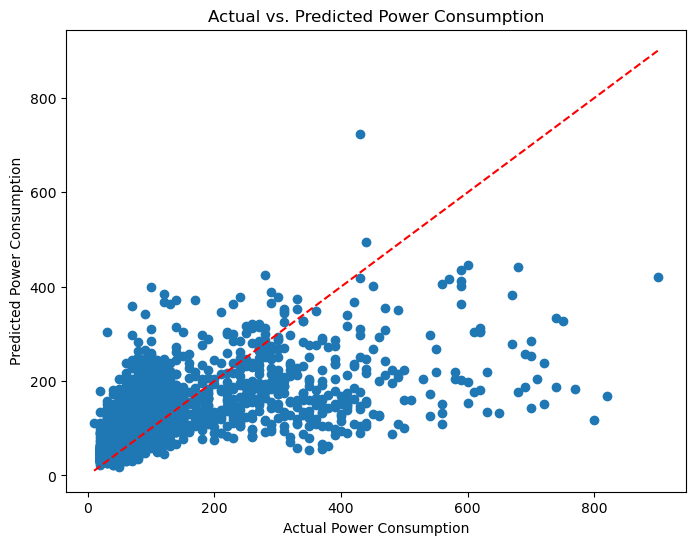

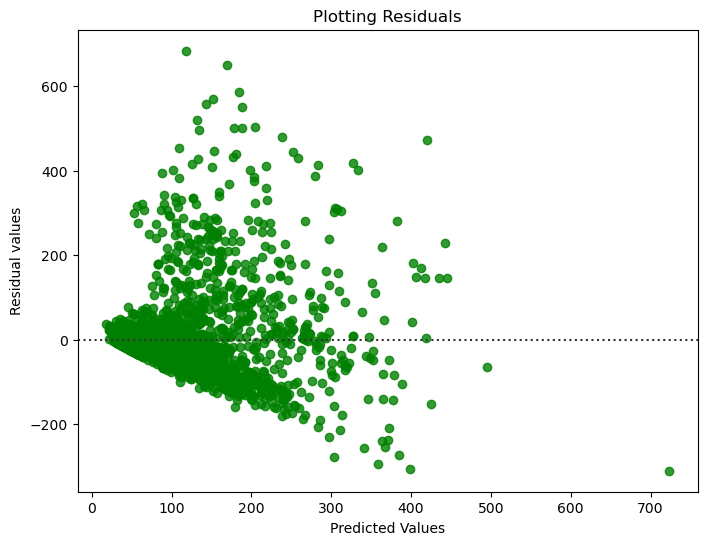

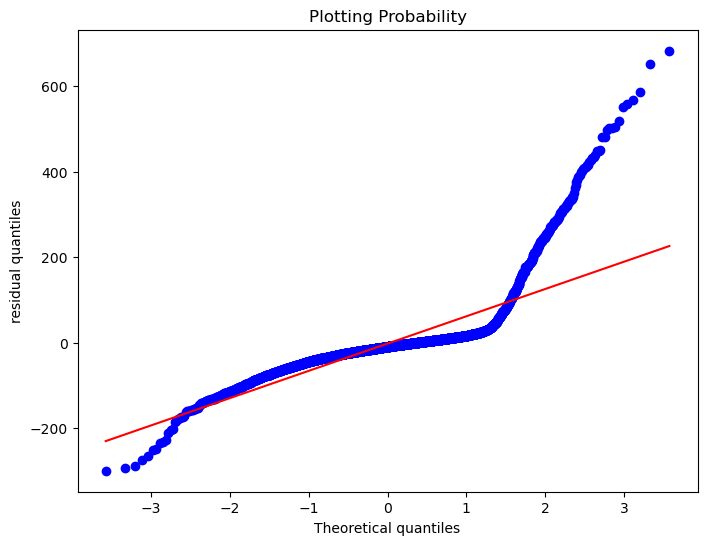

In [26]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
import pandas as pd

# Assuming you have your DataFrame named 'city'
# Split data into features (X) and target (y)
X=ener.drop(['Appliances'],axis=1)
y=ener["Appliances"]


# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Train the GBRT model
gbrt = GradientBoostingRegressor(n_estimators=500, learning_rate=0.1, max_depth=3, random_state=42)
gbrt.fit(X_train, y_train)

# Make predictions
y_pred = gbrt.predict(X_test)

# Evaluate the model
#train_rmse = mean_squared_error(y_train, y_pred_train, squared=False)
#test_rmse = mean_squared_error(y_test, y_pred_test, squared=False)

#print("Train RMSE:", train_rmse)
#print("Test RMSE:", test_rmse)

def regression_results(y_1, y_predict):

    # Regression metrics
    explained_variance=metrics.explained_variance_score(y_test, y_predict)
    mean_absolute_error=metrics.mean_absolute_error(y_test, y_predict) 
    mse=metrics.mean_squared_error(y_test, y_predict) 
    #mean_squared_log_error=metrics.mean_squared_log_error(y_test, predicted)
    median_absolute_error=metrics.median_absolute_error(y_test, y_predict)
    r2=metrics.r2_score(y_test, y_predict)

    print('explained_variance is ',round(explained_variance,2))    
    #print('mean_squared_log_error: ', round(mean_squared_log_error,4))
    print('r2 is ', round(r2,4))
    print('MAE is ', round(mean_absolute_error,4))
    print('MSE is ', round(mse,4))
    print('RMSE is', round(np.sqrt(mse),4))
    

def predicted_plot(y_test, y_predict):
    plt.subplots(figsize=(8,6))
    plt.scatter(y_test, y_predict)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')
    plt.xlabel("Actual Power Consumption")
    plt.ylabel("Predicted Power Consumption")
    plt.title("Actual vs. Predicted Power Consumption")
    plt.show()
    
def residual_plot(y_test, y_predict):
    residual_value = y_test - y_predict
    plt.figure(figsize=(8,6))
    sns.residplot(x=y_predict, y=residual_value ,scatter_kws={"color": "green"})
    plt.title("Plotting Residuals")
    plt.xlabel("Predicted Values")
    plt.ylabel("Residual values")
    plt.show()
    return residual_value

def probability_plot(residual):
    plt.subplots(figsize=(8,6))
    stats.probplot(residual, plot=plt)
    plt.title('Plotting Probability')
    plt.xlabel('Theoretical quantiles')
    plt.ylabel('residual quantiles')
   
    plt.show()

regression_results(y_test,y_pred)
predicted_plot(y_test,y_pred)
residual=residual_plot(y_test,y_pred)
probability_plot(residual)

